In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import ghibtools as gh

In [2]:
da = xr.load_dataarray('../dataarray/da_tf_frontal_P18.nc')

In [3]:
da_time = xr.load_dataarray('../dataarray/da_N2N3_P18.nc')

In [4]:
t_init = 3337
t_end = 3350
resp = gh.filter_sig(da_time.loc['DEBIT',t_init:t_end].values, 256, 0.2, 0.5)
zero_cross = gh.detect_zerox(resp)
da_sliced = da.loc[10:16,t_init:t_end]
f = da_sliced.coords['freqs'].values
t = da_sliced.coords['time'].values
data = da_sliced.values

/mnt/autofs/cmo/Etudiants/Valentin_G/ghibtools/ghibtools/signals.py:79: RuntimeWarning: filter_length (4225) is longer than the signal (3329), distortion is likely. Reduce filter length or filter a longer signal.
  filtered_sig = mne.filter.filter_data(sig, sfreq=fs, l_freq = low, h_freq = high, verbose = False)


In [5]:
rises = zero_cross['rises'].astype(int).values
decays = zero_cross['decays'].dropna().astype(int).values

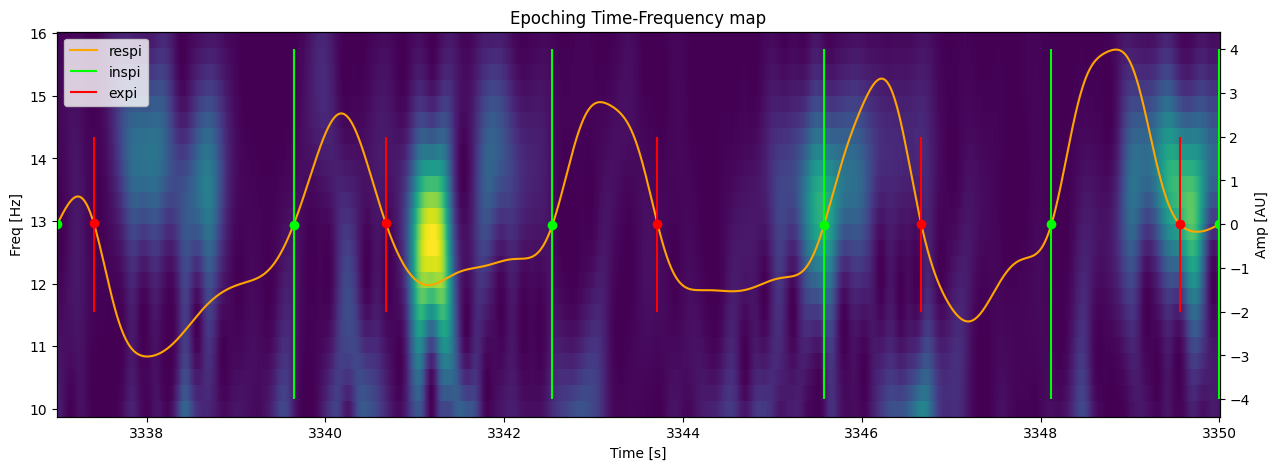

In [6]:
fig, ax = plt.subplots(figsize = (15,5))
ax.set_title('Epoching Time-Frequency map')
ax.pcolormesh(t, f , data)
ax.set_ylabel('Freq [Hz]')
ax.set_xlabel('Time [s]')
ax2 = ax.twinx()
ax2.plot(t, resp, color = 'orange', label = 'respi')
ax2.plot(t[rises], resp[rises],'o', color = 'lime')
ax2.plot(t[decays], resp[decays],'o', color = 'red')
ax2.vlines(x=t[rises], ymin = -4, ymax = 4, color = 'lime', label = 'inspi')
ax2.vlines(x=t[decays], ymin = -2, ymax = 2, color = 'red', label = 'expi')
ax2.set_ylabel('Amp [AU]')
ax2.legend()
plt.savefig('../pour_congrès_lille/epoching_tf', bbox_inches = 'tight')
plt.show()

In [7]:
times = t
data = data.T
cycle_times = ((zero_cross / 256) + t_init).values

In [8]:
cycles_times_final, cycles, deformed_data = gh.deform_to_cycle_template(data, times , cycle_times , nb_point_by_cycle = 1000)

n cycle removed = 1


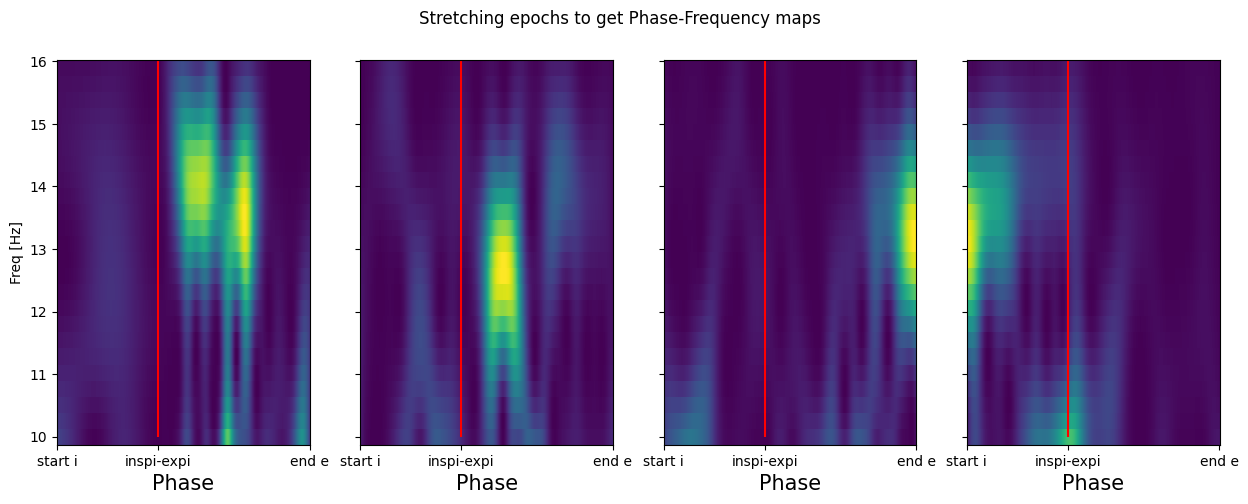

In [9]:
phases = np.arange(1,1001,1)
fig, axs = plt.subplots(ncols = cycles.size, sharey = True, figsize = (15,5))
fig.suptitle('Stretching epochs to get Phase-Frequency maps')
maps = np.zeros((4, 24, 1000))
for i in range(cycles.size):
    ax = axs[i]
    start = i*1000
    stop = start + 1000
    cycle_tf = deformed_data[start:stop,:].T
    maps[i,:,:] = cycle_tf 
    ax.pcolormesh(phases, f, cycle_tf)
    ax.vlines(x = 400, ymin = 10, ymax = 16, color = 'r')
    ax.set_xticks([0, 400 , 1000])
    ax.set_xticklabels(['start i','inspi-expi','end e'])
    if i == 0:
        ax.set_ylabel('Freq [Hz]')
    ax.set_xlabel('Phase', fontsize = 15)
plt.savefig('../pour_congrès_lille/stretching_tf', bbox_inches = 'tight')
plt.show()

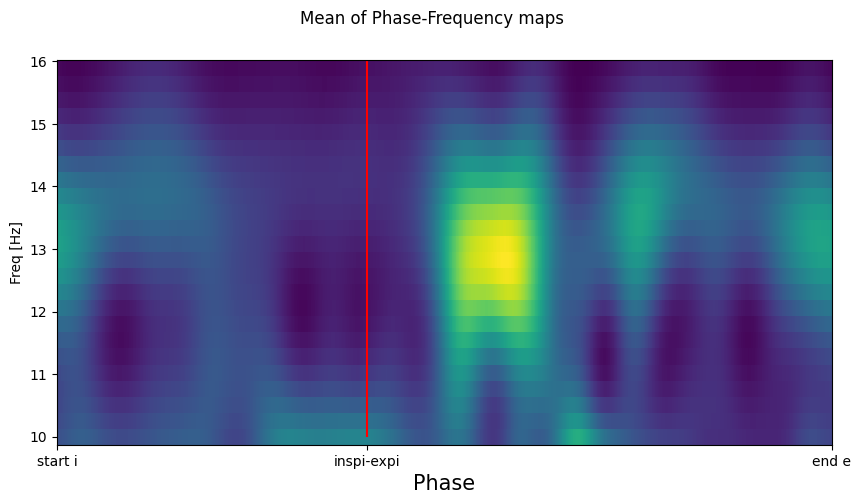

In [10]:
phases = np.arange(1,1001,1)
fig, ax = plt.subplots(figsize = (10,5))
fig.suptitle('Mean of Phase-Frequency maps')

ax.pcolormesh(phases, f, np.mean(maps, axis = 0))
ax.vlines(x = 400, ymin = 10, ymax = 16, color = 'r')
ax.set_xticks([0, 400 , 1000])
ax.set_xticklabels(['start i','inspi-expi','end e'])
ax.set_ylabel('Freq [Hz]')
ax.set_xlabel('Phase', fontsize = 15)
plt.savefig('../pour_congrès_lille/mean_pf', bbox_inches = 'tight')
plt.show()